# Module 6 - Clustering for Diverse portfolio analysis

   ### Welcome to the Answer notebook for Module 6 ! 


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 6.1 
Create a table/dataframe with the closing prices of 30 different stocks, with 10 from each of the caps

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import re
import glob
import os
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
import sklearn.cluster
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
%matplotlib notebook


In [2]:
def read_csv( filename ):
    if isinstance(filename, pd.DataFrame): return filename  # OPTIMIZATION: allow passthrough of existing dataframe

    dataframe = pd.read_csv( filename, parse_dates=['Date'] )
    return dataframe

def getName( filename ):
    return re.sub(r'^.+/|\.[^.]+$',     '',    filename)

dir='' #location of file
filenames = glob.glob(os.path.join(dir, '*.csv'))

portfolio = DataFrame()
for filename in filenames:
        portfolio[ getName(filename) ] = read_csv(filename)['Close Price']

print('portfolio.shape: ', portfolio.shape)
portfolio.head()

portfolio.shape:  (494, 30)


,VENKEYS,RAYMOND,EICHERMOT,MINDTREE,VOLTAS,BAJFINANCE,RELINFRA,JKLAKSHMI,VIPIND,GUJALKALI,...,EXIDEIND,SUNTV,INFY,BAJAJELEC,MRPL,DRREDDY,ADANIPOWER,ASHOKA,INFRATEL,CUMMINSIND
0,1169.70,772.80,28930.60,509.45,431.85,1332.95,605.40,510.80,199.20,457.35,...,245.80,912.20,951.55,341.15,134.2,2675.80,30.25,216.05,371.05,1066.05
1,1177.00,785.00,29362.50,511.30,432.45,1347.75,611.05,527.50,200.90,455.25,...,244.70,894.70,955.00,347.00,131.7,2724.10,32.85,214.90,376.55,1047.75
2,1188.00,783.65,29093.55,506.35,430.20,1324.80,605.25,516.20,199.65,472.65,...,243.20,887.05,952.80,349.85,135.1,2736.90,33.10,217.00,389.90,1016.45
3,1156.90,746.95,28357.30,492.90,414.10,1314.55,578.65,478.95,193.30,461.85,...,239.85,871.35,961.75,334.10,136.1,2678.95,31.90,209.65,378.90,1054.45
4,1161.65,723.10,27936.05,497.50,415.75,1289.15,569.55,469.55,195.95,455.35,...,238.15,852.40,957.95,336.20,133.6,2656.45,32.40,206.25,378.95,972.95


### Query 6.2

Calculate average annual percentage return and volatility of all 30 stocks over a theoretical one year period



In [3]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

weights = random_weights()
weights

array([0.00700701, 0.01201201, 0.02702703, 0.06106106, 0.06006006,
       0.01301301, 0.05305305, 0.00900901, 0.03503504, 0.05705706,
       0.04004004, 0.01701702, 0.05205205, 0.05405405, 0.02302302,
       0.06706707, 0.04204204, 0.01801802, 0.06106106, 0.06606607,
       0.02202202, 0.        , 0.03703704, 0.06006006, 0.05105105,
       0.02802803, 0.002002  , 0.003003  , 0.01401401, 0.00800801])

In [4]:
working_days_per_year    = 252
portfolio_summary = DataFrame()
portfolio_summary['Annual_return']    = portfolio.pct_change().mean() * working_days_per_year
portfolio_summary['Annual_volatility'] = portfolio.pct_change().std()  * np.sqrt( working_days_per_year )
portfolio_summary

,Annual_return,Annual_volatility
VENKEYS,0.381711,0.627383
RAYMOND,0.070021,0.363834
EICHERMOT,-0.136246,0.294935
MINDTREE,0.392570,0.341485
VOLTAS,0.191030,0.308346
BAJFINANCE,0.452758,0.321060
RELINFRA,-0.750074,0.547576
JKLAKSHMI,-0.168865,0.279668
VIPIND,0.479664,0.432069
GUJALKALI,0.112144,0.385492


### Query 6.3

Cluster the 30 stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method

### Elbow Curve


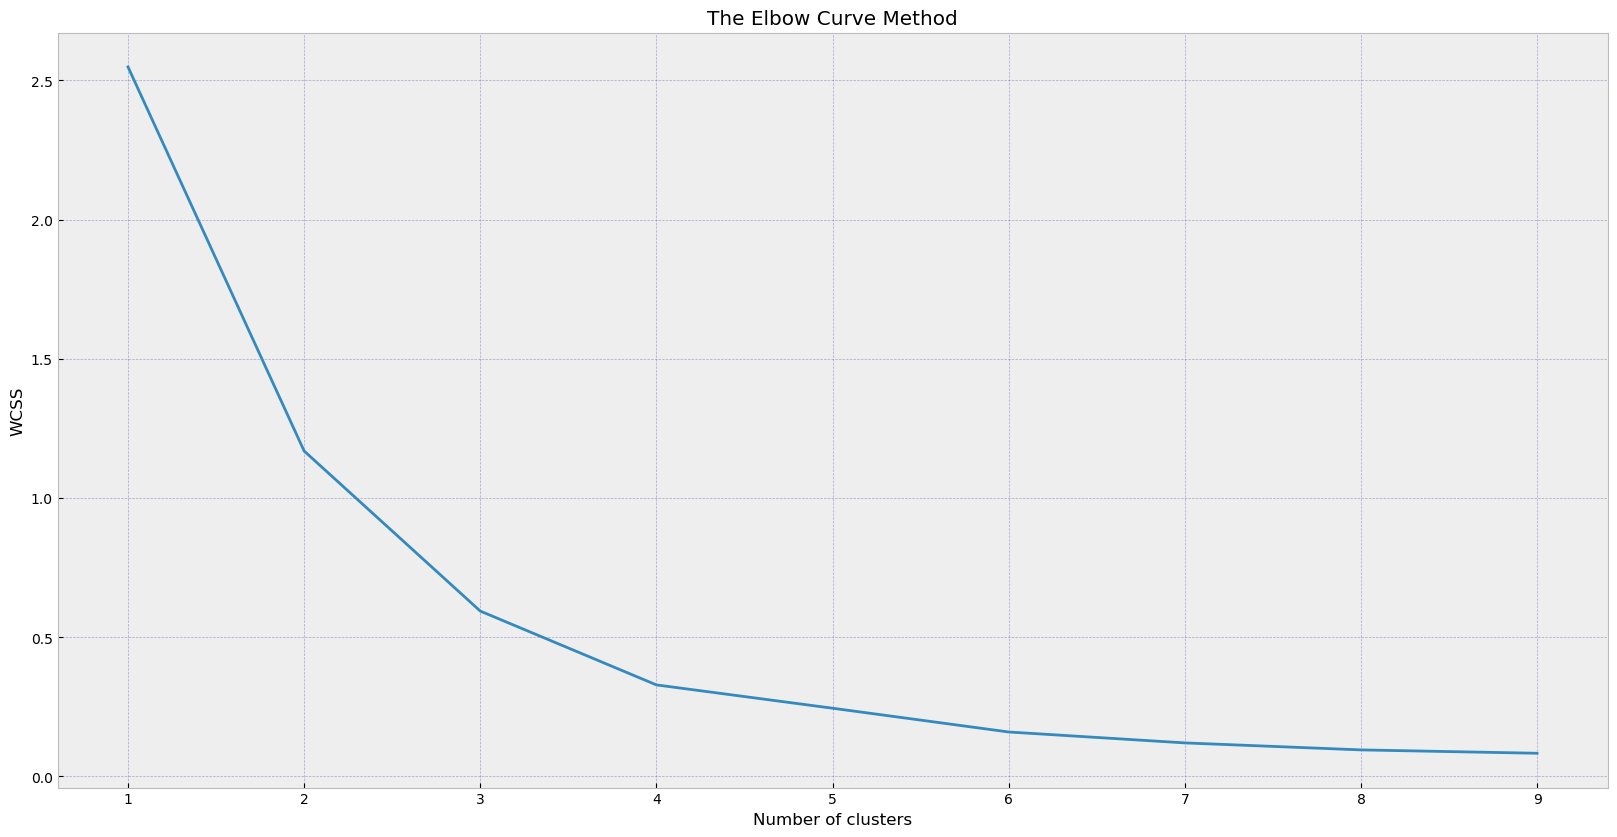

In [5]:
elbow_curve = [ None ] + [ sklearn.cluster.KMeans(n_clusters=n, random_state=2).fit(portfolio_summary).inertia_ for n in range(1,10) ]

plt.figure(figsize = (20,10), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.plot(elbow_curve)
plt.title('The Elbow Curve Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

> From the above charts, the first major elbow happens at n=6 clusters.


## K-Means Clustering


In [6]:
X=portfolio_summary.iloc[:,0:2].values

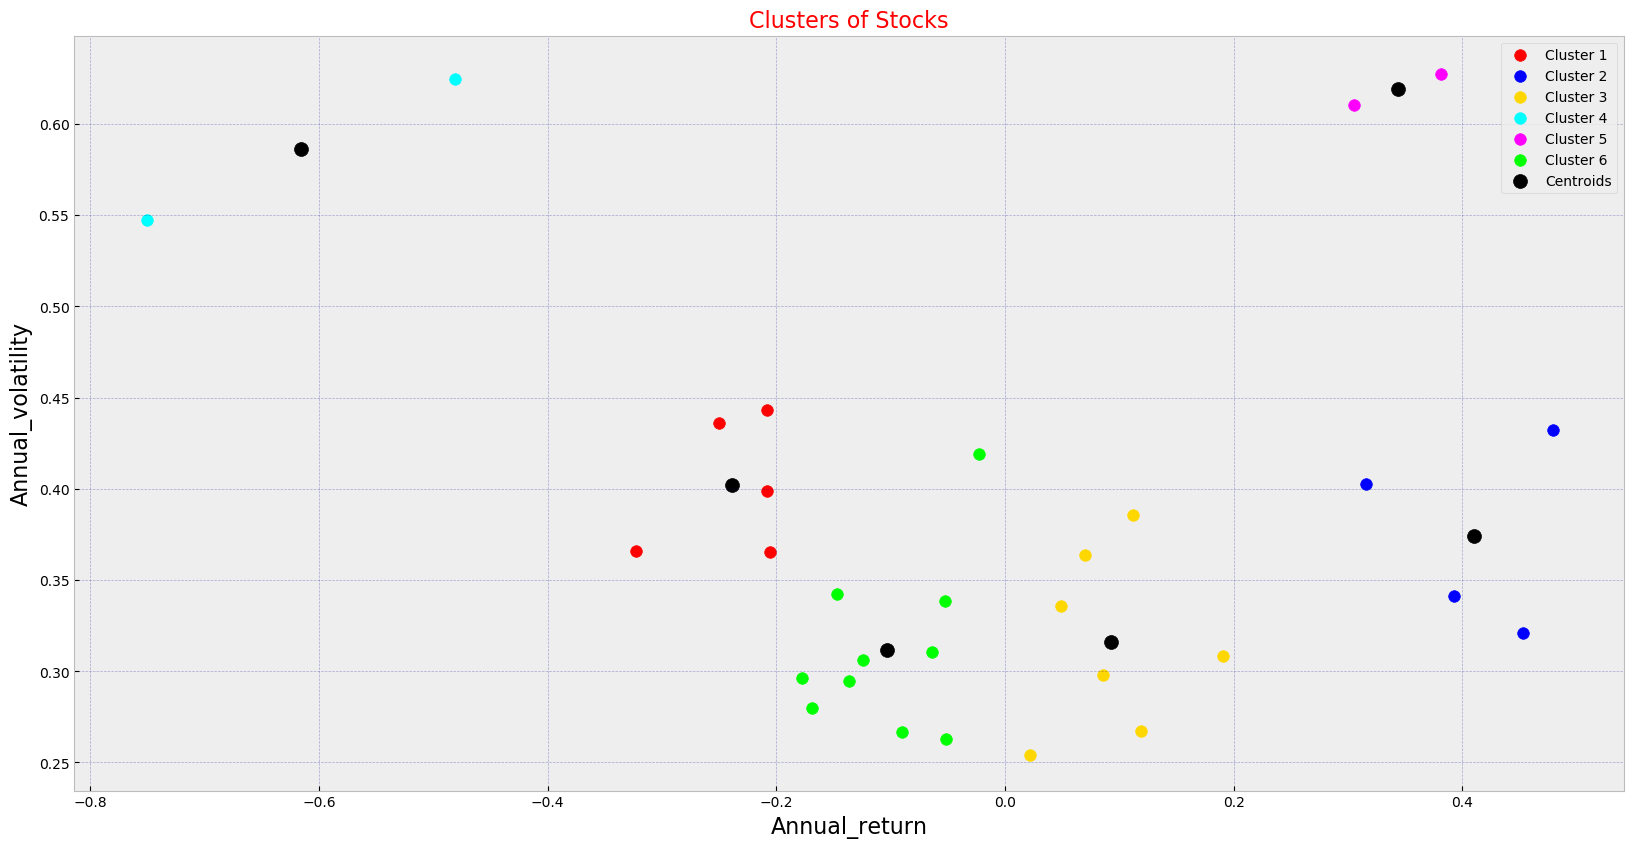

In [7]:
portfolio_kmeans      = sklearn.cluster.KMeans(n_clusters=6, init = 'k-means++',random_state=0).fit(portfolio_summary)
portfolio_kmeans_predict = portfolio_kmeans.predict(portfolio_summary)

plt.figure(figsize = (20,10), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)

plt.scatter(X[portfolio_kmeans_predict == 0, 0], X[portfolio_kmeans_predict == 0, 1], s= 70, c = 'red', label = 'Cluster 1')
plt.scatter(X[portfolio_kmeans_predict == 1, 0], X[portfolio_kmeans_predict == 1, 1], s= 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X[portfolio_kmeans_predict == 2, 0], X[portfolio_kmeans_predict == 2, 1], s= 70, c = 'gold', label = 'Cluster 3')
plt.scatter(X[portfolio_kmeans_predict == 3, 0], X[portfolio_kmeans_predict == 3, 1], s= 70, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[portfolio_kmeans_predict == 4, 0], X[portfolio_kmeans_predict == 4, 1], s= 70, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[portfolio_kmeans_predict == 5, 0], X[portfolio_kmeans_predict == 5, 1], s= 70, c = 'lime', label = 'Cluster 6')

plt.scatter(portfolio_kmeans.cluster_centers_[:, 0], portfolio_kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters of Stocks', size = 16, color = 'red')
plt.xlabel('Annual_return', size = 16, color = 'black')
plt.ylabel('Annual_volatility', size = 16, color = 'black')
plt.legend()
plt.show()

### Query 6.4

Prepare a separate Data frame to show which stocks belong to the same cluster



In [8]:
portfolio_summary['Cluster'] = portfolio_kmeans.predict( portfolio_summary[['Annual_return', 'Annual_volatility']] )
portfolio_summary.sort_values(by=['Cluster'],ascending=True)

,Annual_return,Annual_volatility,Cluster
SUNTV,-0.205704,0.365414,0
ASHOKA,-0.208509,0.442974,0
MRPL,-0.322957,0.365898,0
BPCL,-0.250364,0.436175,0
WELSPUNIND,-0.208058,0.399071,0
BAJAJELEC,0.316053,0.402414,1
MINDTREE,0.392570,0.341485,1
BAJFINANCE,0.452758,0.321060,1
VIPIND,0.479664,0.432069,1
CIPLA,0.021976,0.254183,2
